In [1]:
import pandas as pd
import pickle
import numpy as np
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
with open('C:/Users/LG/bigcontest/dataset/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
sh = sh_data['SH_RESIDENT']
#2019년 2020년 분리
year_2019 = sh.loc[sh['YEAR']==2019]
year_2020 = sh.loc[sh['YEAR']==2020]

In [ ]:
def file_open(category):
    path = './dataset/'
    cat_w_19 =category+'_week_2019.xlsx'
    cat_w_20 =category+'_week_2020.xlsx'
    cat_d_19 =category+'_day_2019.xlsx'
    cat_d_20 =category+'_day_2020.xlsx'
    week_2019 = pd.read_excel(path+cat_w_19)
    week_2020 = pd.read_excel(path+cat_w_20)
    day_2019 = pd.read_excel(path+cat_d_19)
    day_2020 = pd.read_excel(path+cat_d_20)
    return week_2019,week_2020,day_2019,day_2020

In [ ]:
# 주 단위로 신한 AMT 합치기
def week_sum(sh_2019,sh_2020):
    sh_2019.set_index(sh_2019['DATE'],inplace=True)
    sh_2019 = sh_2019['USE_AMT'].resample('W').sum()
    sh_2020.set_index(sh_2020['DATE'],inplace=True)
    sh_2020 = sh_2020['USE_AMT'].resample('W').sum()
    return sh_2019,sh_2020

In [ ]:
# 네이버 데이터랩 표준화
def scale_naver(week_2019, week_2020,category):
    scaler = MinMaxScaler(feature_range=(0, 1))
    naver_week_2019 = scaler.fit_transform(np.array(week_2019[category]).reshape(-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    naver_week_2020 = scaler.fit_transform(np.array(week_2020[category]).reshape(-1,1))
    return naver_week_2019, naver_week_2020

In [ ]:
# 신한 데이터 표준화
def scale_sh(sh_2019,sh_2020):
    scaler = MinMaxScaler(feature_range=(0, 1))
    sh_2019 = scaler.fit_transform(np.array(sh_2019).reshape(-1,1))[1:-1]
    sh_2020 = scaler.fit_transform(np.array(sh_2020).reshape(-1,1))[1:]
    return sh_2019,sh_2020

In [ ]:
# 그래프 그리기
def draw_graph(category):
    label1 = week_2019['날짜'].unique()
    index1 = np.arange(len(label1))
    label2 = week_2020['날짜'].unique()
    index2 = np.arange(len(label2))

    plt.figure(figsize = (40,7))

    plt.plot(index1, sh_2019,'>-',label= 'SH_AMT')
    plt.plot(index1, naver_week_2019,'d-',label= 'NAVER')
    plt.xticks(index1, label1)
    plt.legend()
    plt.title('19년도'+category)

    plt.figure(figsize = (40,7))
    plt.plot(index2, sh_2020,'>-',label= 'SH_AMT')
    plt.plot(index2, naver_week_2020,'d-',label= 'NAVER')
    plt.xticks(index2, label2)
    plt.legend()
    plt.title('20년도'+category)

    plt.show()

In [ ]:
def correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020):
    naver_week_2019 = naver_week_2019.reshape(1,-1)
    sh_2019 = sh_2019.reshape(1,-1)
    naver_week_2020 = naver_week_2020.reshape(1,-1)
    sh_2020 = sh_2020.reshape(1,-1)
    a_19 =pd.DataFrame(np.array(naver_week_2019).reshape(16,1))
    b_19 =pd.DataFrame(np.array(sh_2019).reshape(16,1))
    a_20 =pd.DataFrame(np.array(naver_week_2020).reshape(17,1))
    b_20 =pd.DataFrame(np.array(sh_2020).reshape(17,1))
    cat_19 = pd.concat([a_19,b_19], axis = 1)
    cat_20 = pd.concat([a_20,b_20], axis = 1)
    return cat_19.corr(),cat_20.corr()

## 숙박

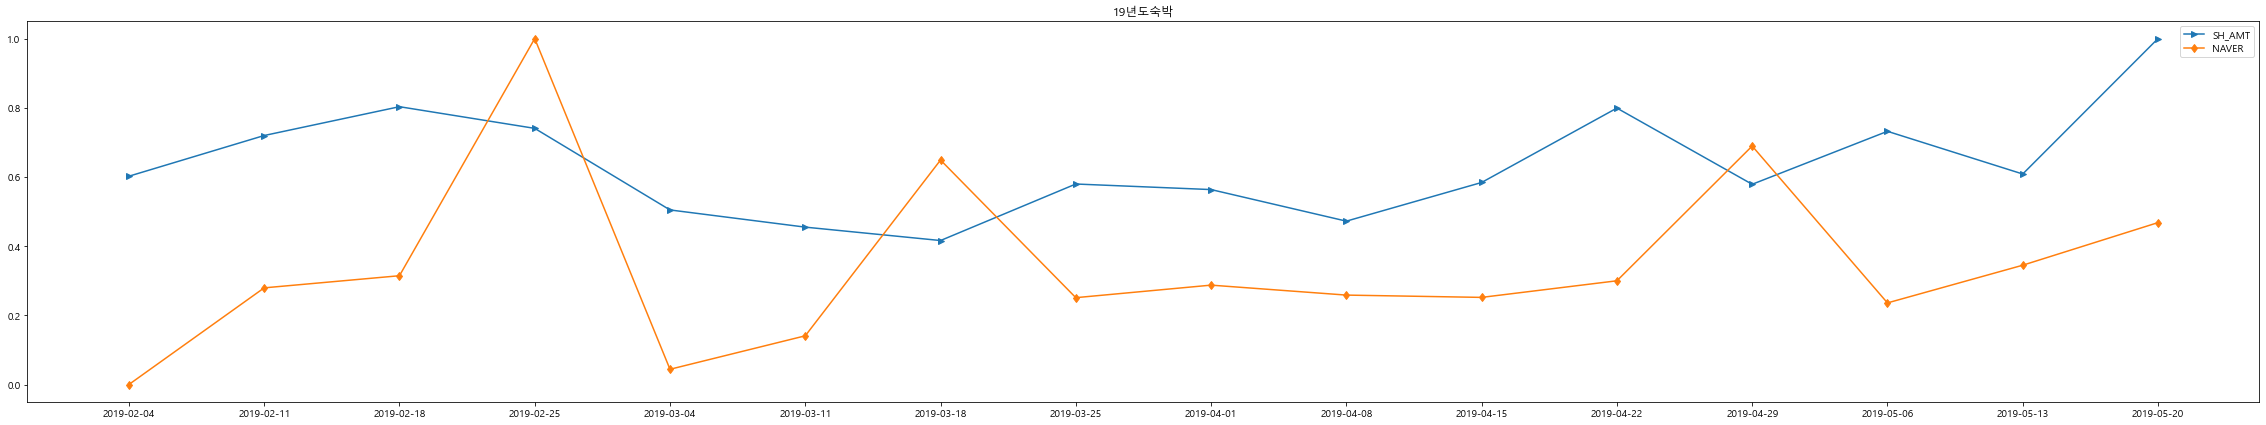

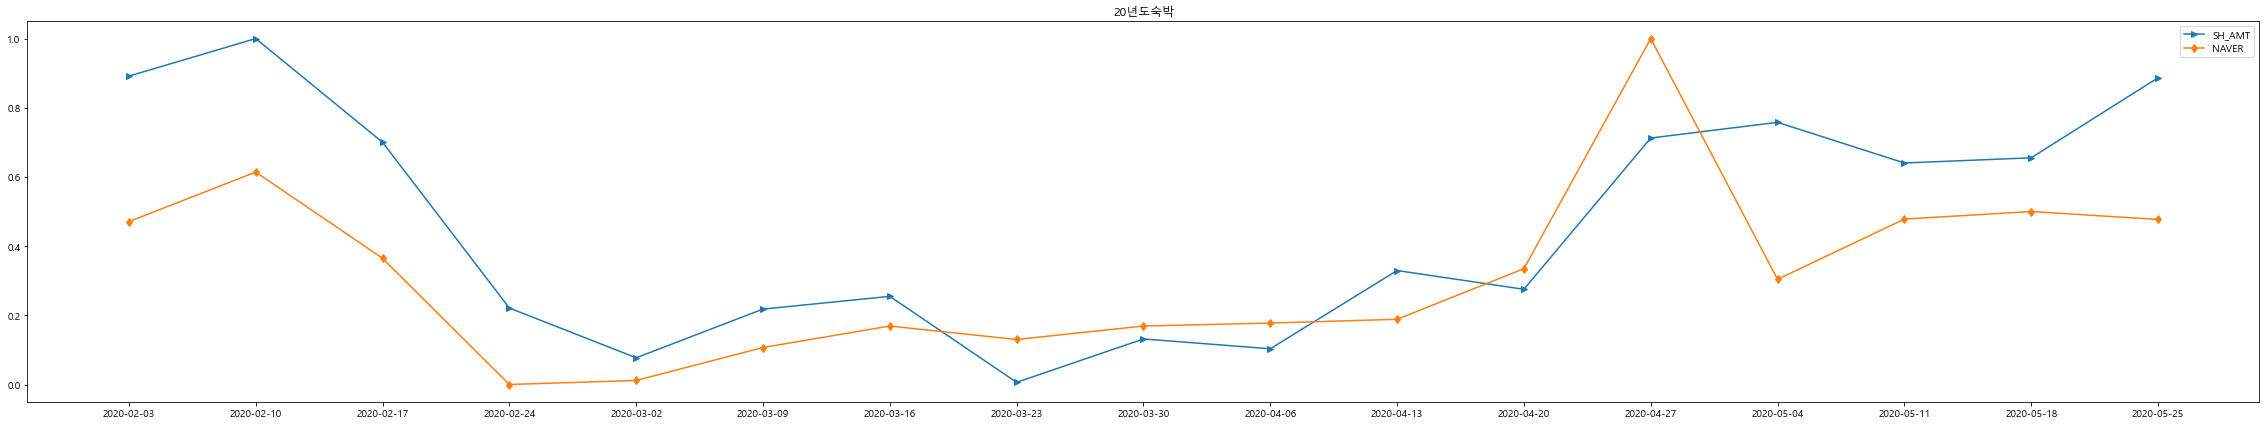

In [28]:
category = '숙박'
category_num = 10
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [29]:
corr_19

,0,0
0,1.000000,0.197384
0,0.197384,1.000000


In [27]:
corr_20

,0,0
0,1.000000,0.759638
0,0.759638,1.000000


## 레져용품

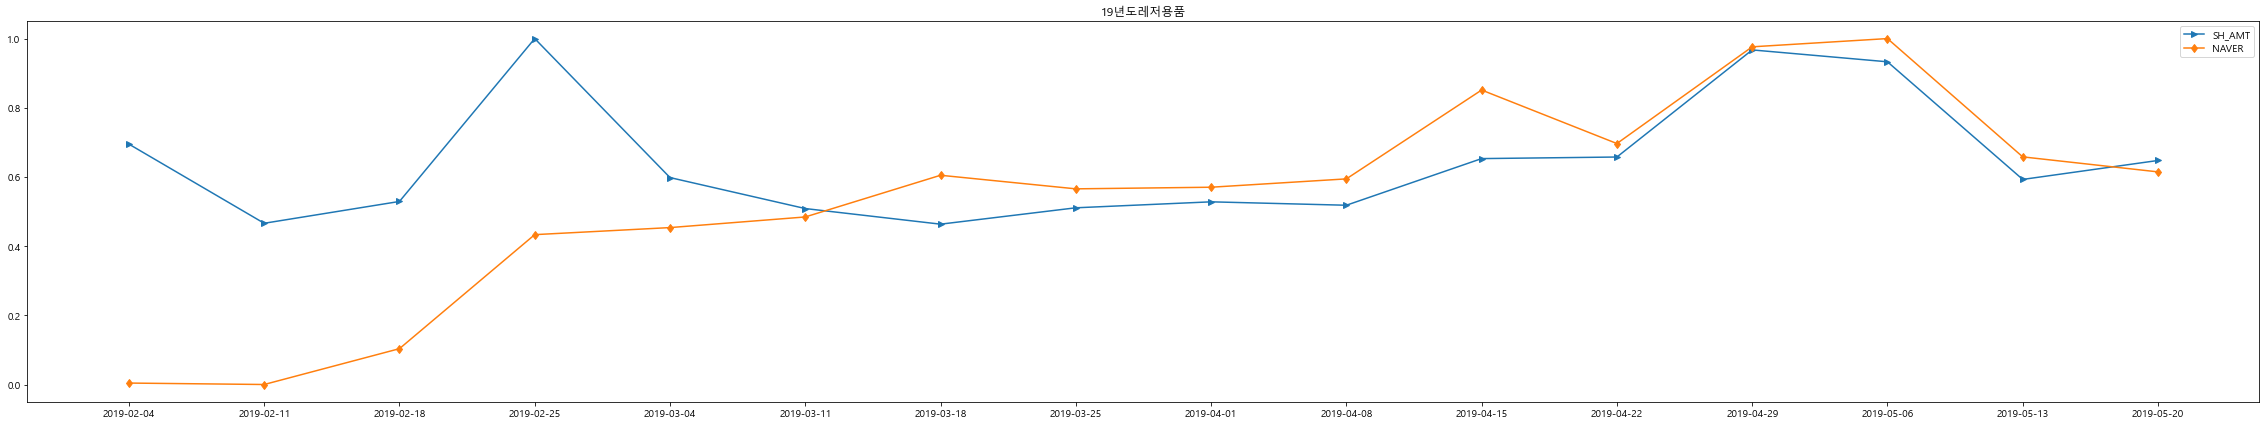

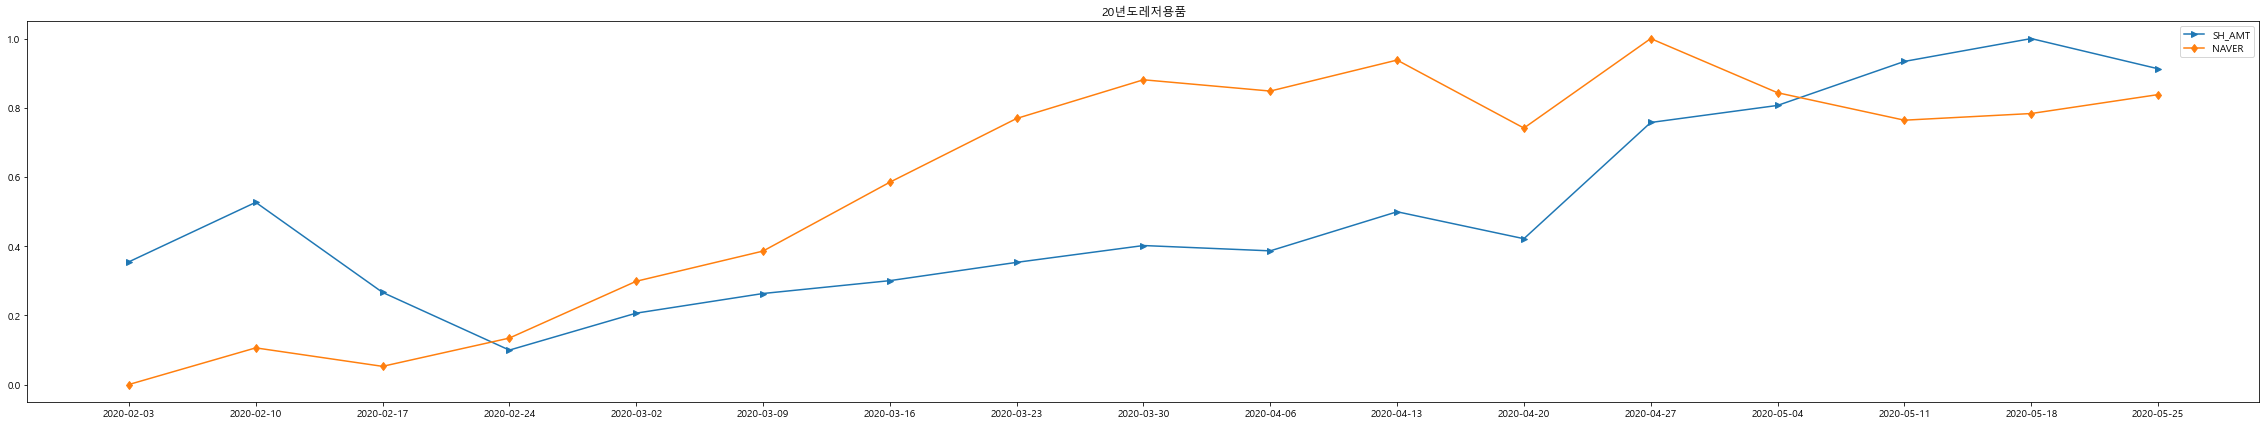

In [30]:
category = '레저용품'
category_num = 20
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [31]:
corr_19

,0,0
0,1.000000,0.430236
0,0.430236,1.000000


In [32]:
corr_20

,0,0
0,1.000000,0.572946
0,0.572946,1.000000


## 레저업소

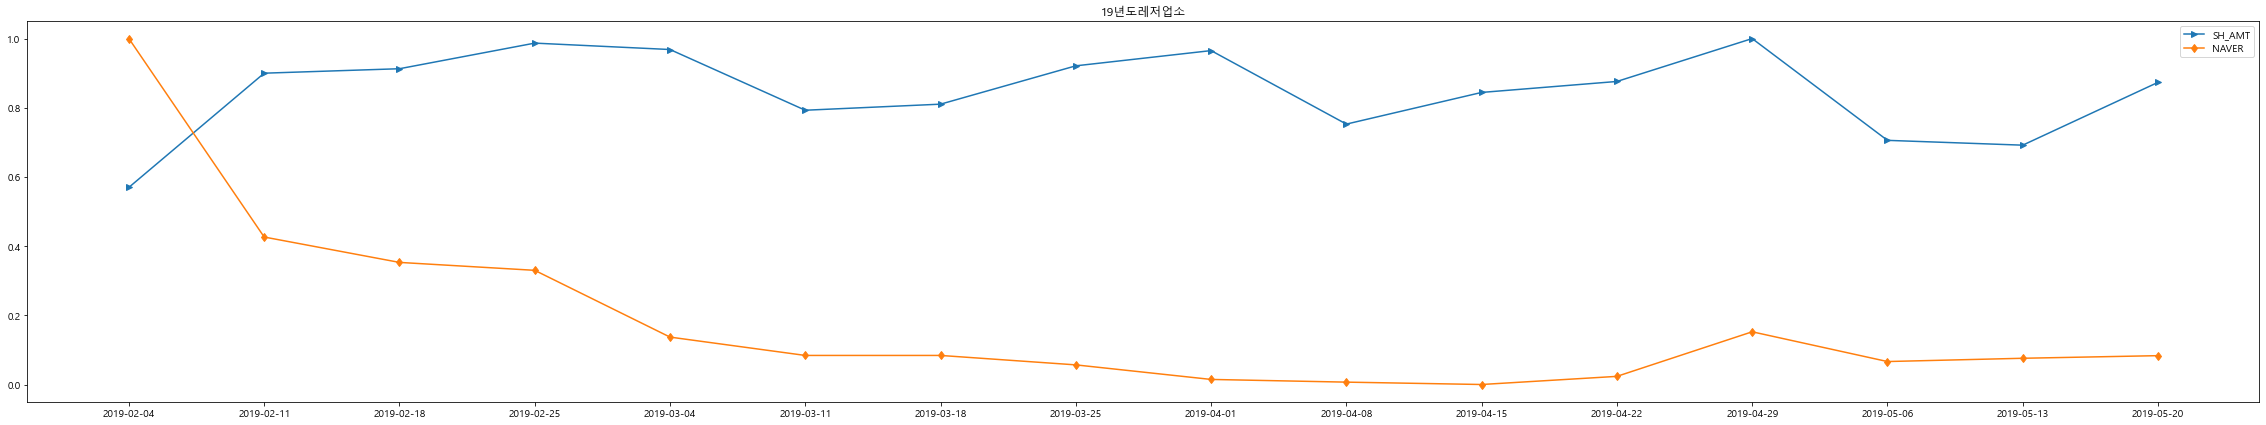

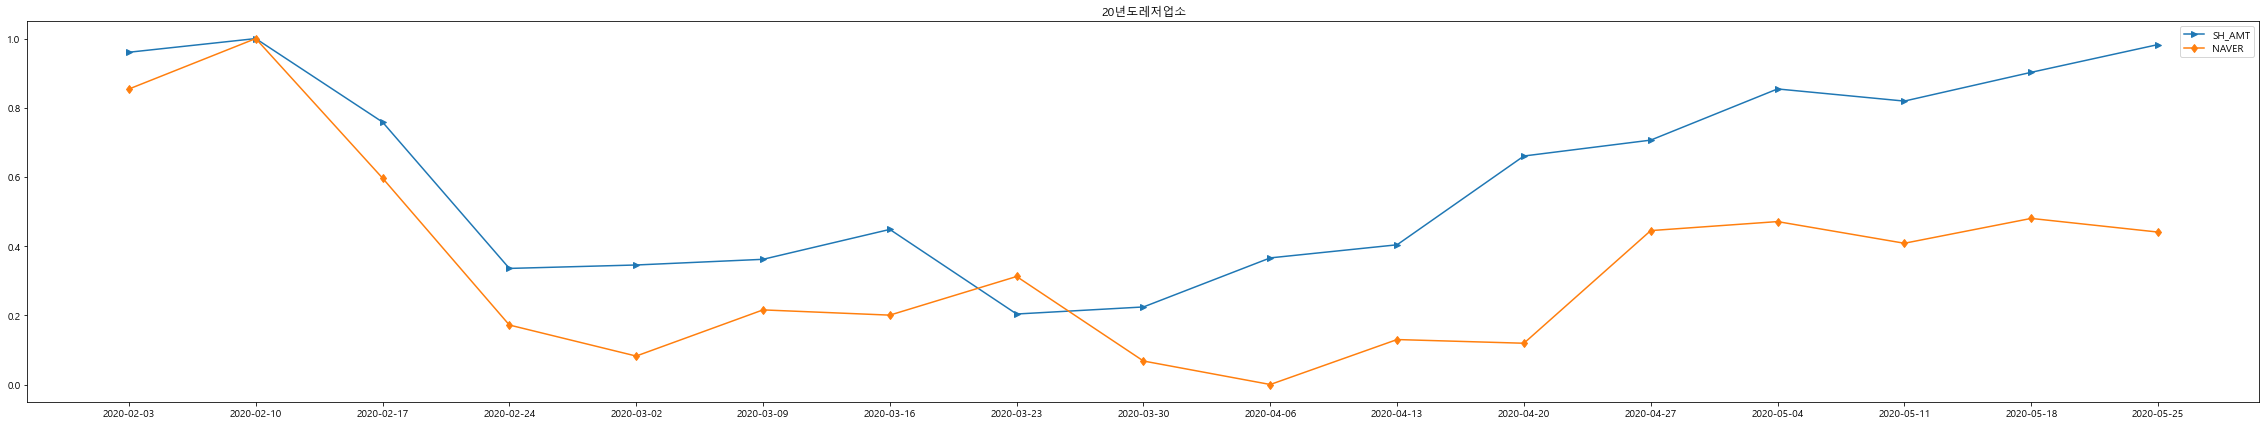

In [33]:
category = '레저업소'
category_num = 21
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [34]:
corr_19

,0,0
0,1.000000,-0.366891
0,-0.366891,1.000000


In [35]:
corr_20

,0,0
0,1.000000,0.800541
0,0.800541,1.000000


## 문화취미

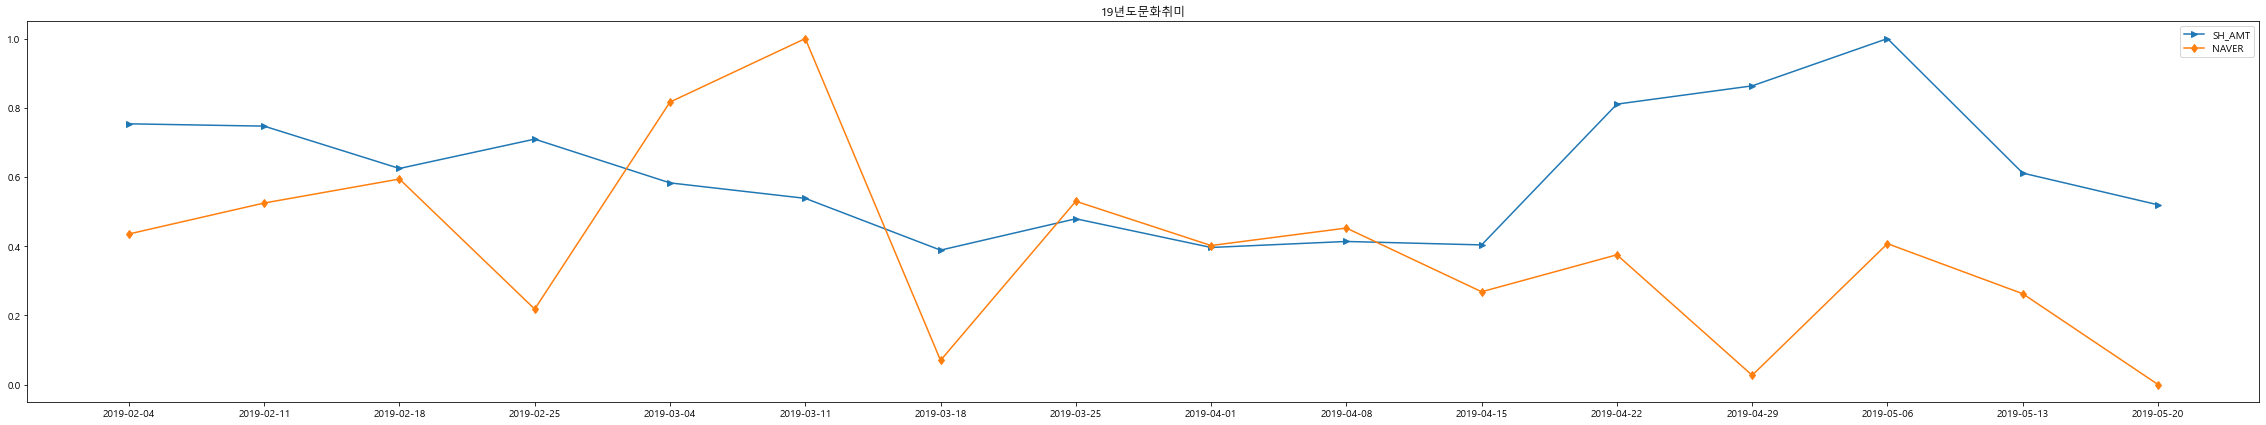

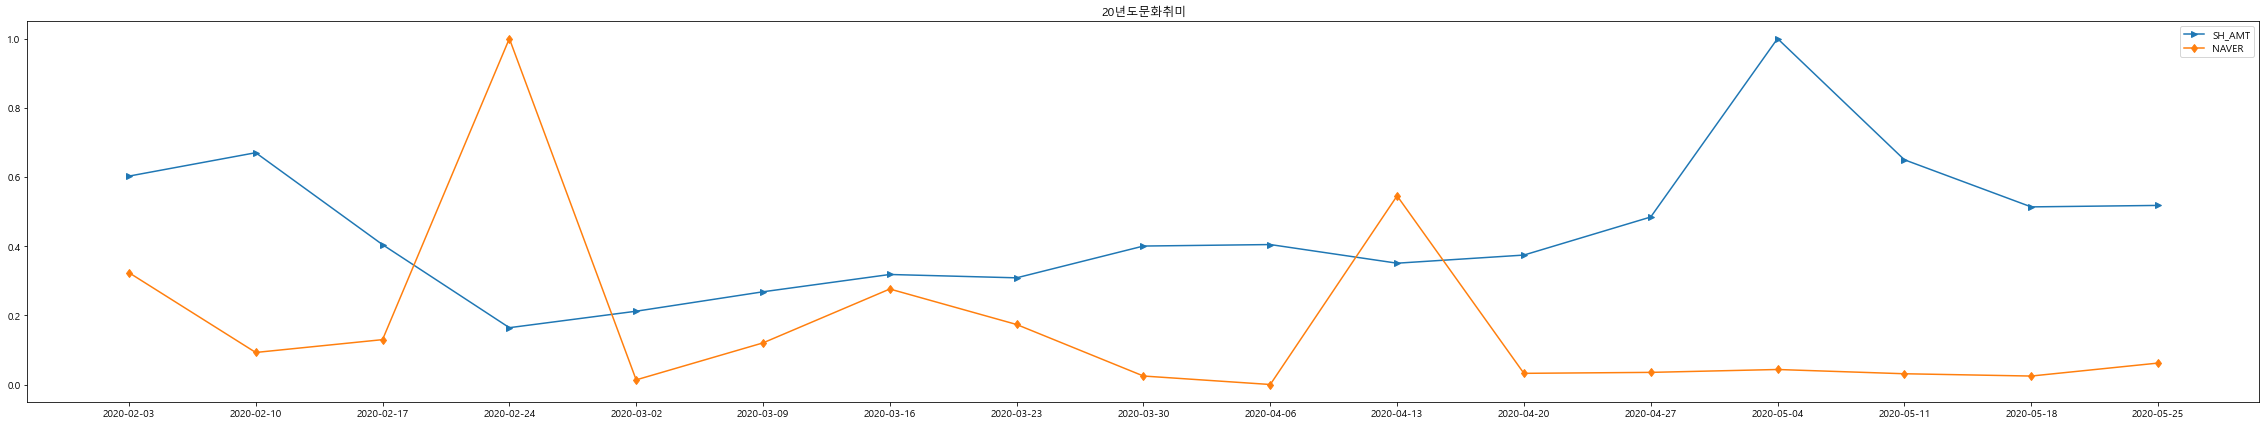

In [20]:
category = '문화취미'
category_num = 22
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [34]:
corr_19

,0,0
0,1.000000,-0.047576
0,-0.047576,1.000000


In [35]:
corr_20

,0,0
0,1.000000,-0.394117
0,-0.394117,1.000000


## 가구

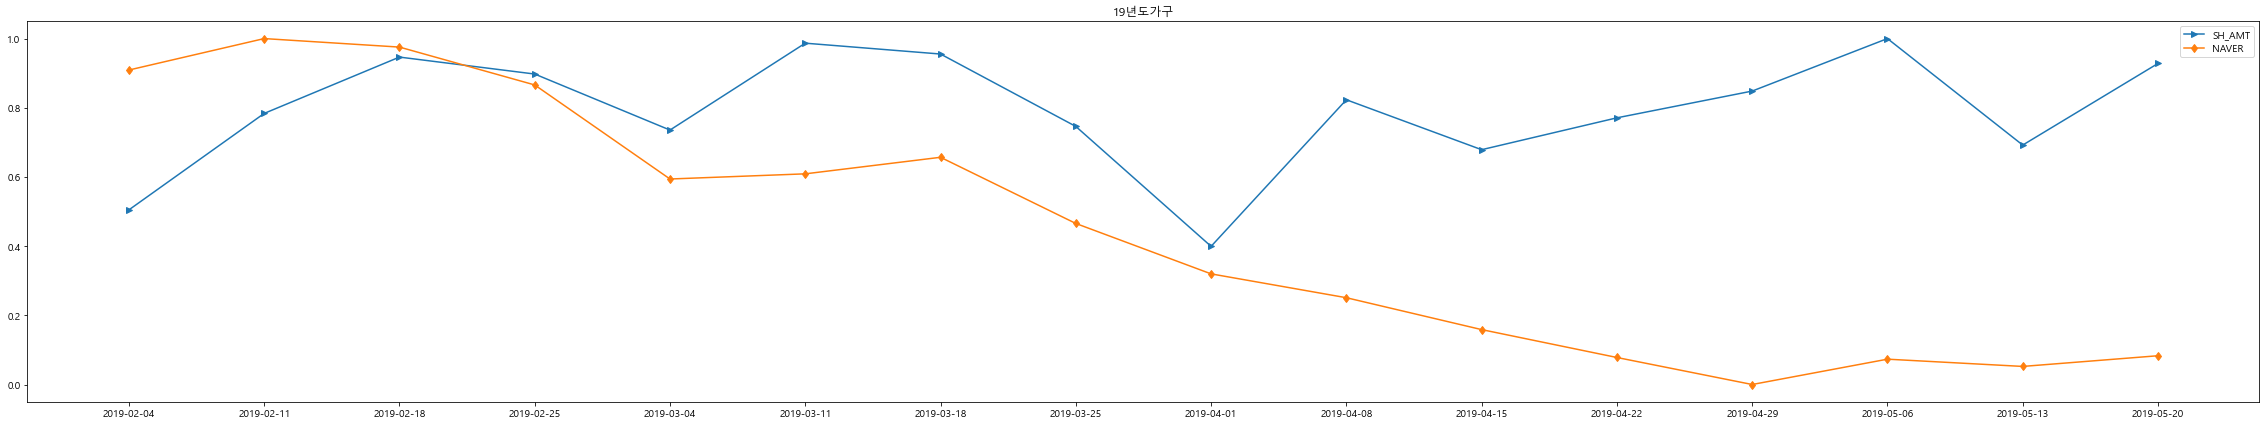

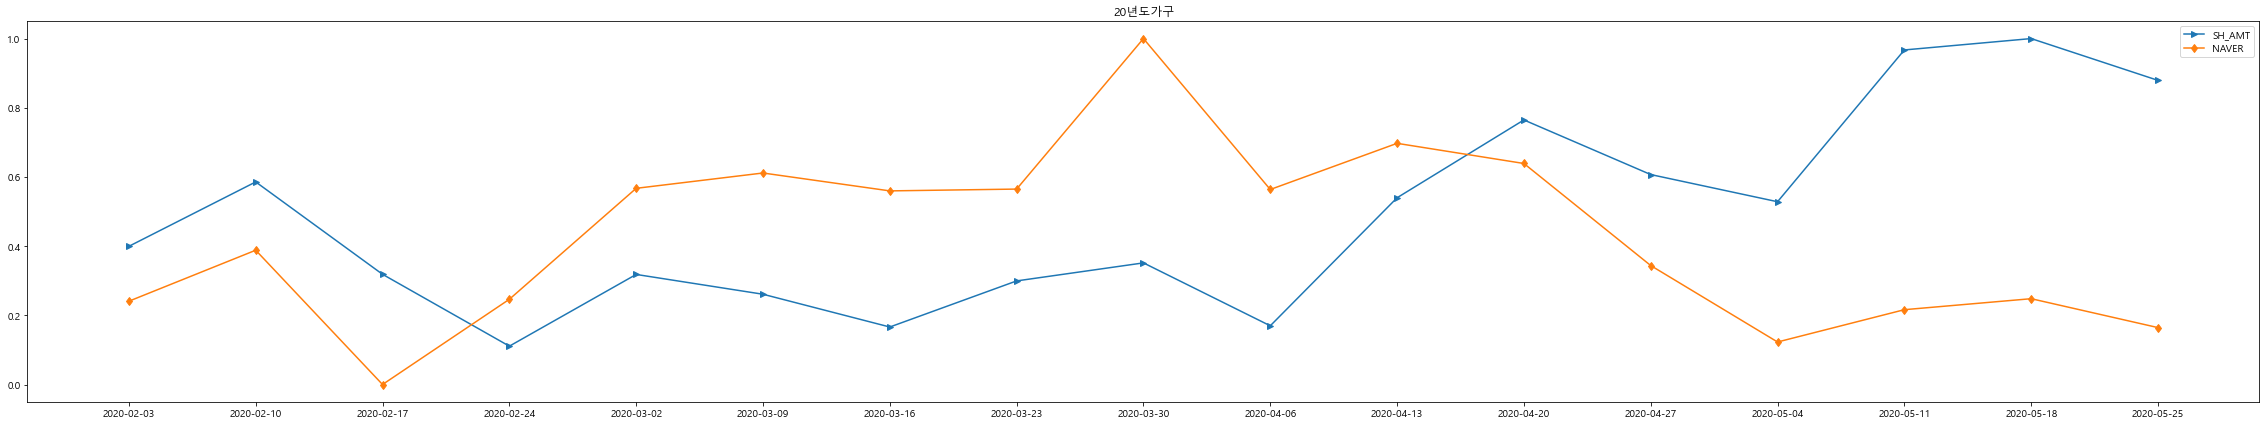

In [16]:
category = '가구'
category_num = 30
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [17]:
corr_19

,0,0
0,1.000000,0.017967
0,0.017967,1.000000


In [18]:
corr_20

,0,0
0,1.00000,-0.30142
0,-0.30142,1.00000


## 전기

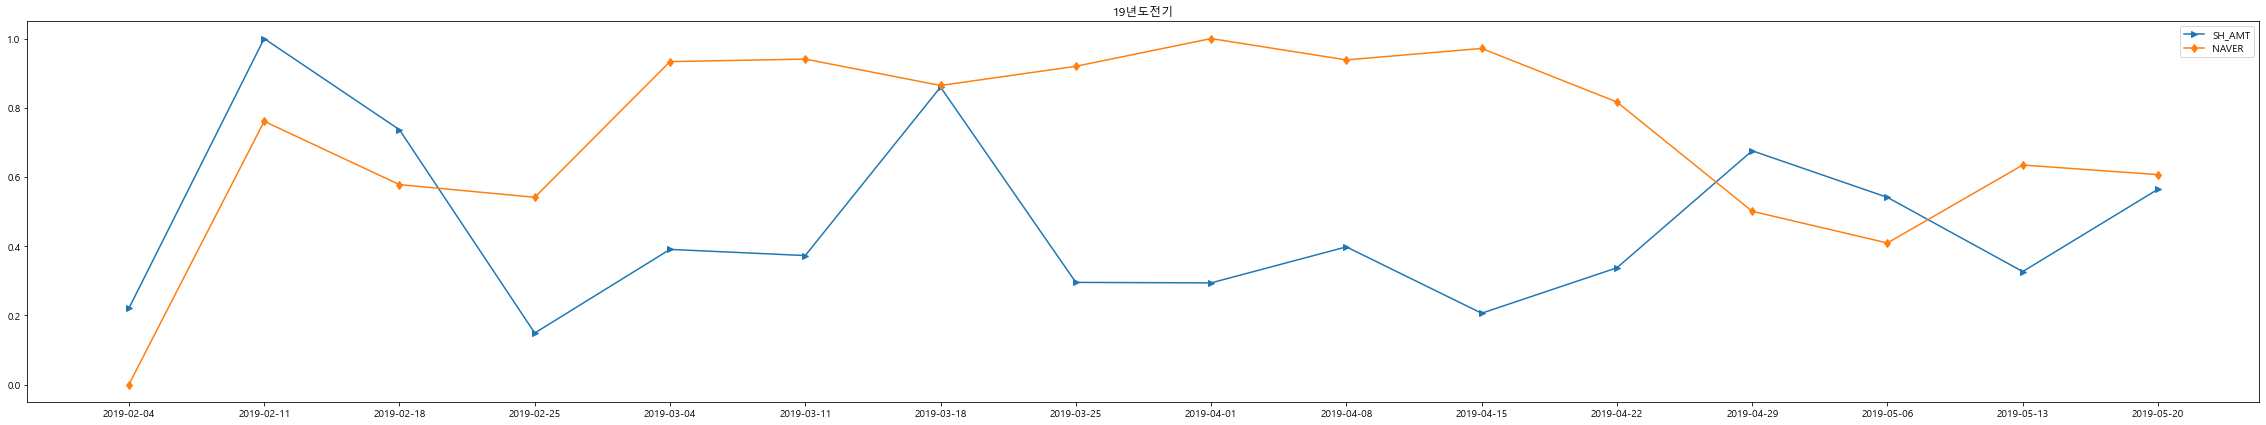

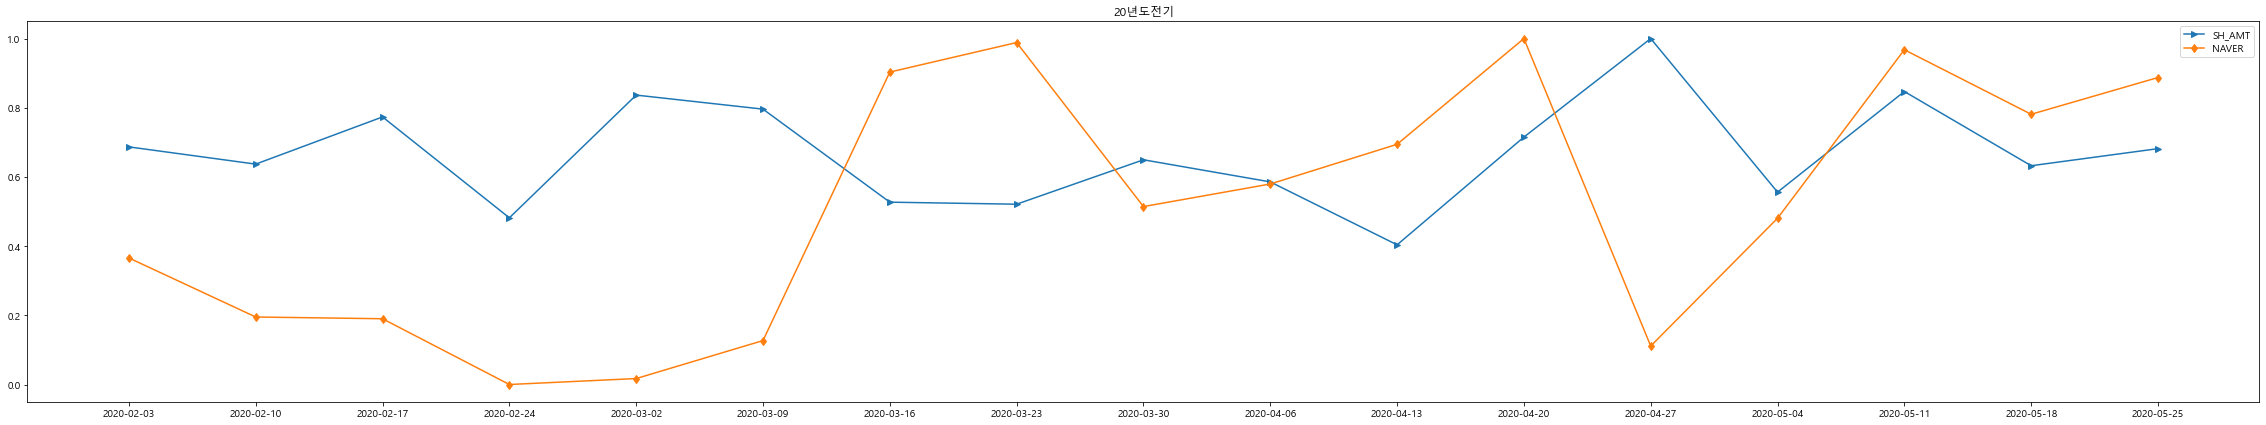

In [36]:
category = '전기'
category_num = 31
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [37]:
corr_19

,0,0
0,1.000000,-0.007019
0,-0.007019,1.000000


In [38]:
corr_20

,0,0
0,1.000000,-0.308211
0,-0.308211,1.000000


## 주방용구

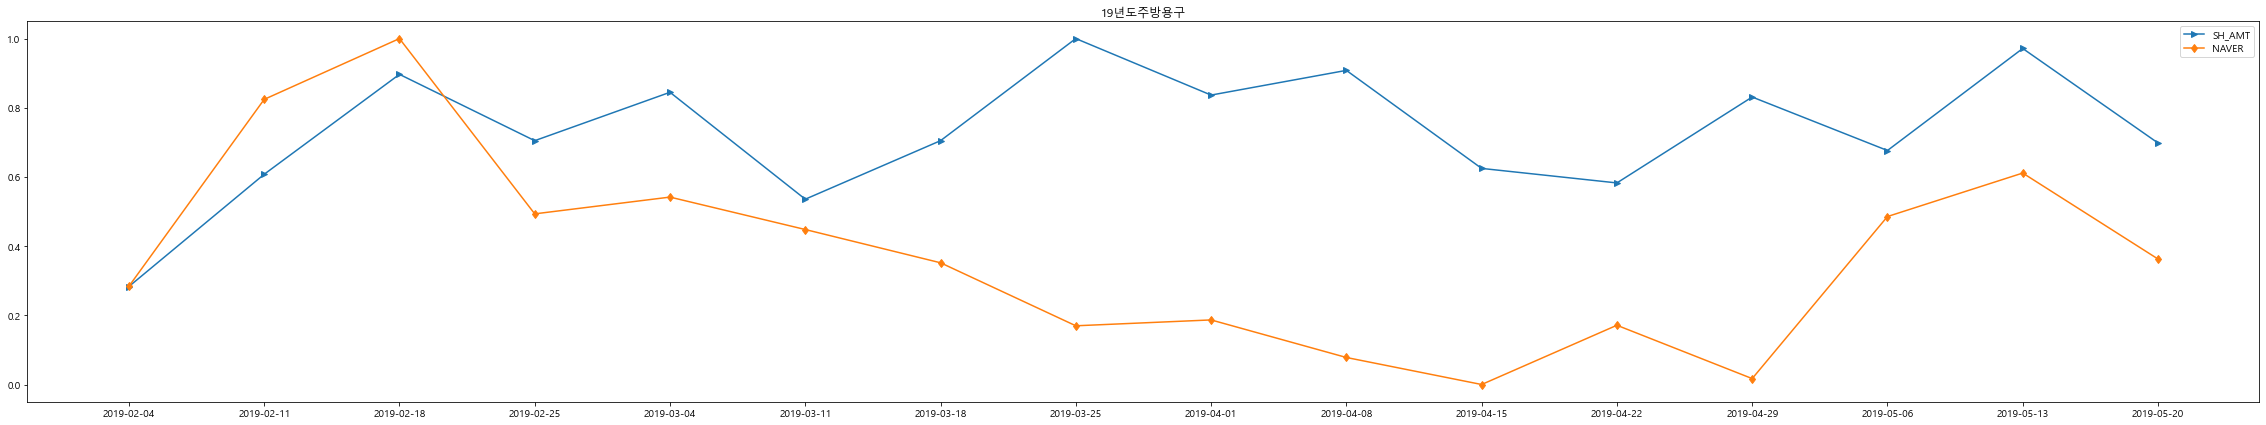

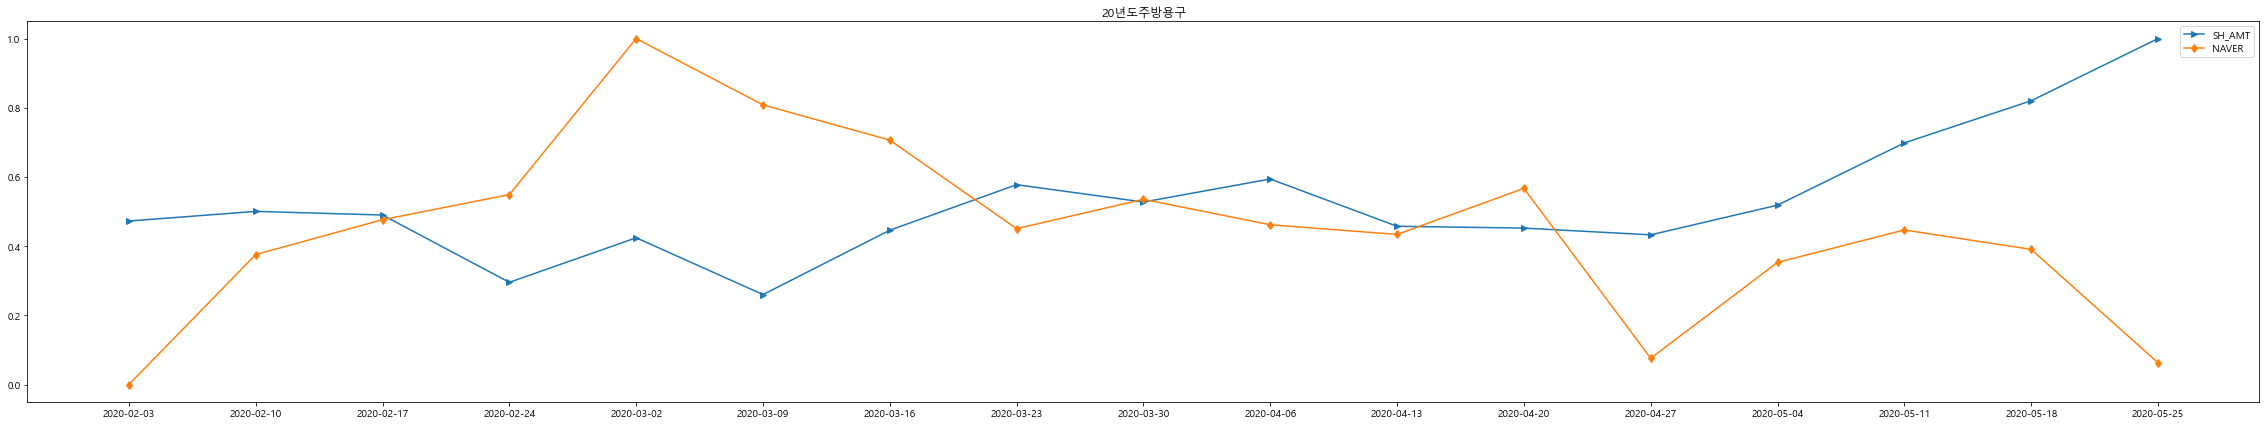

In [39]:
category = '주방용구'
category_num = 32
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [40]:
corr_19

,0,0
0,1.000000,0.062312
0,0.062312,1.000000


In [41]:
corr_20

,0,0
0,1.000000,-0.468747
0,-0.468747,1.000000


## 연료판매

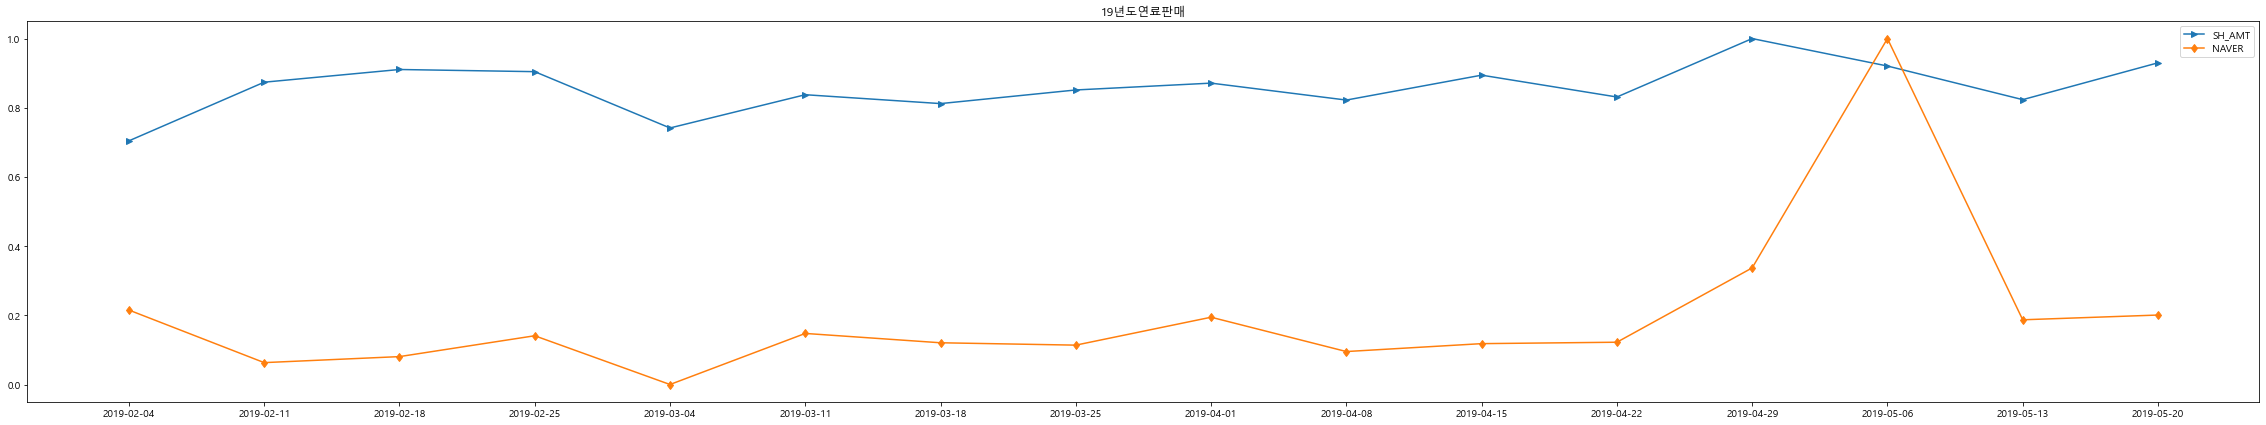

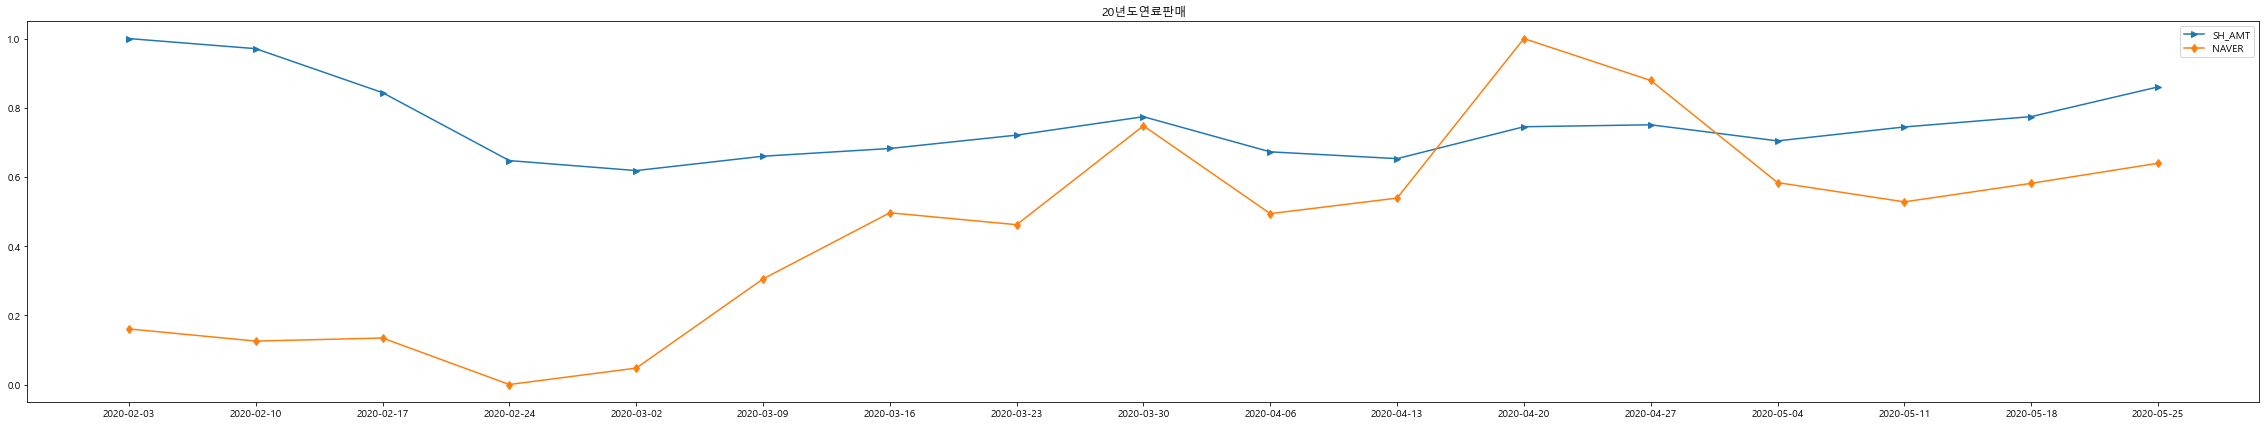

In [42]:
category = '연료판매'
category_num = 33
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [43]:
corr_19

,0,0
0,1.000000,0.355537
0,0.355537,1.000000


In [44]:
corr_20

,0,0
0,1.000000,-0.107951
0,-0.107951,1.000000


## 광학제품

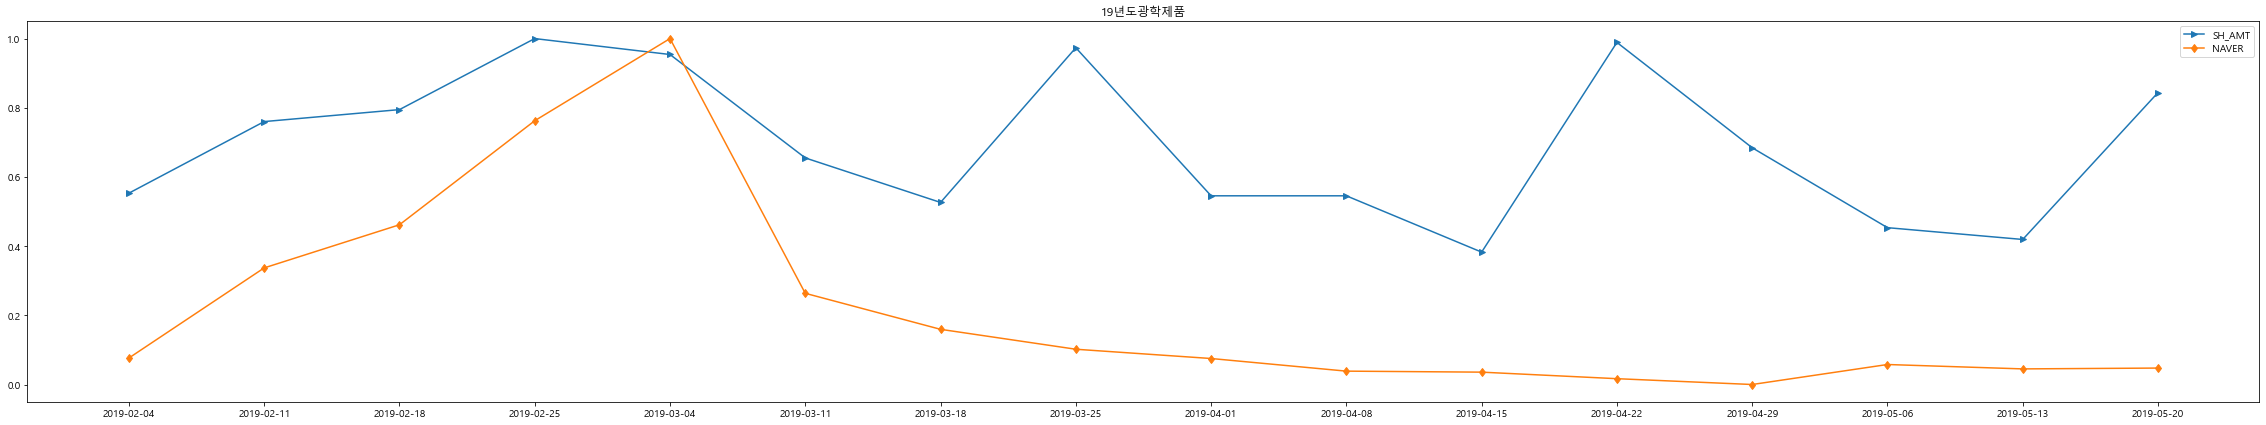

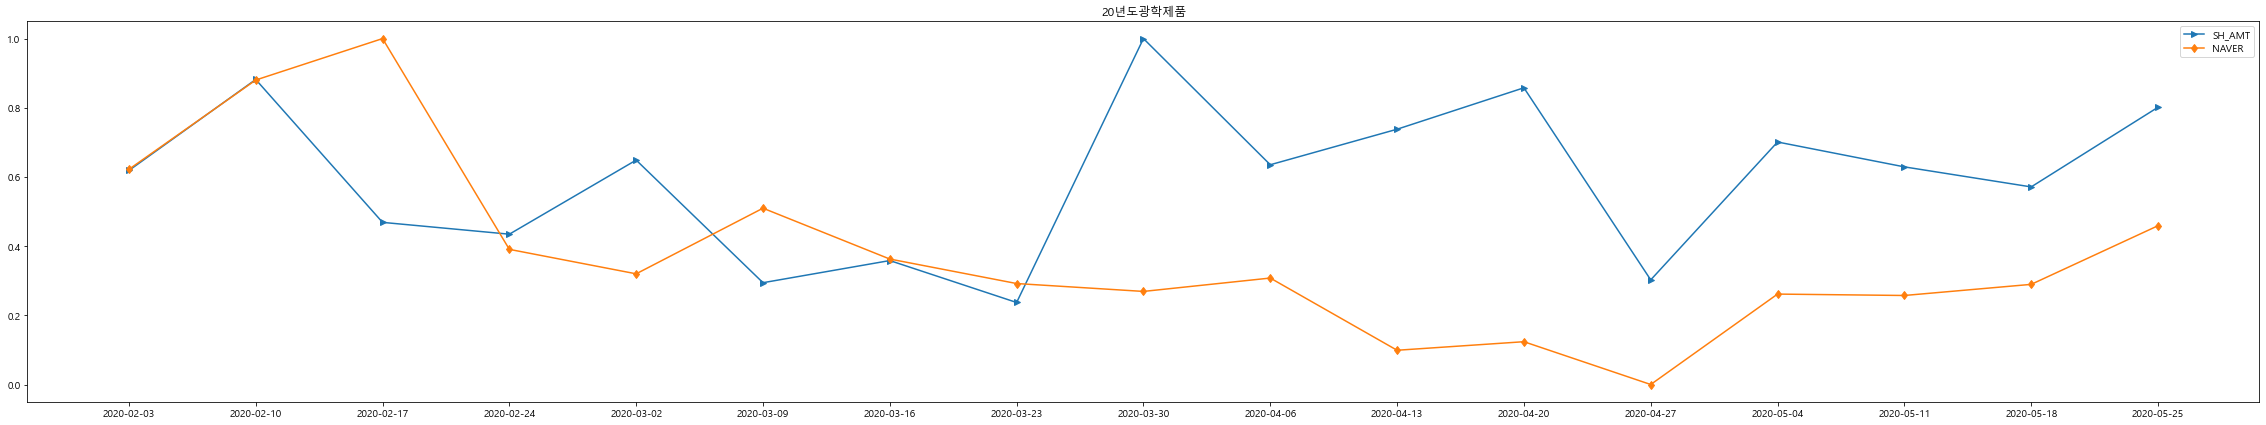

In [45]:
category = '광학제품'
category_num = 34
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [46]:
corr_19

,0,0
0,1.000000,0.539346
0,0.539346,1.000000


In [47]:
corr_20

,0,0
0,1.000000,0.021774
0,0.021774,1.000000


## 가전

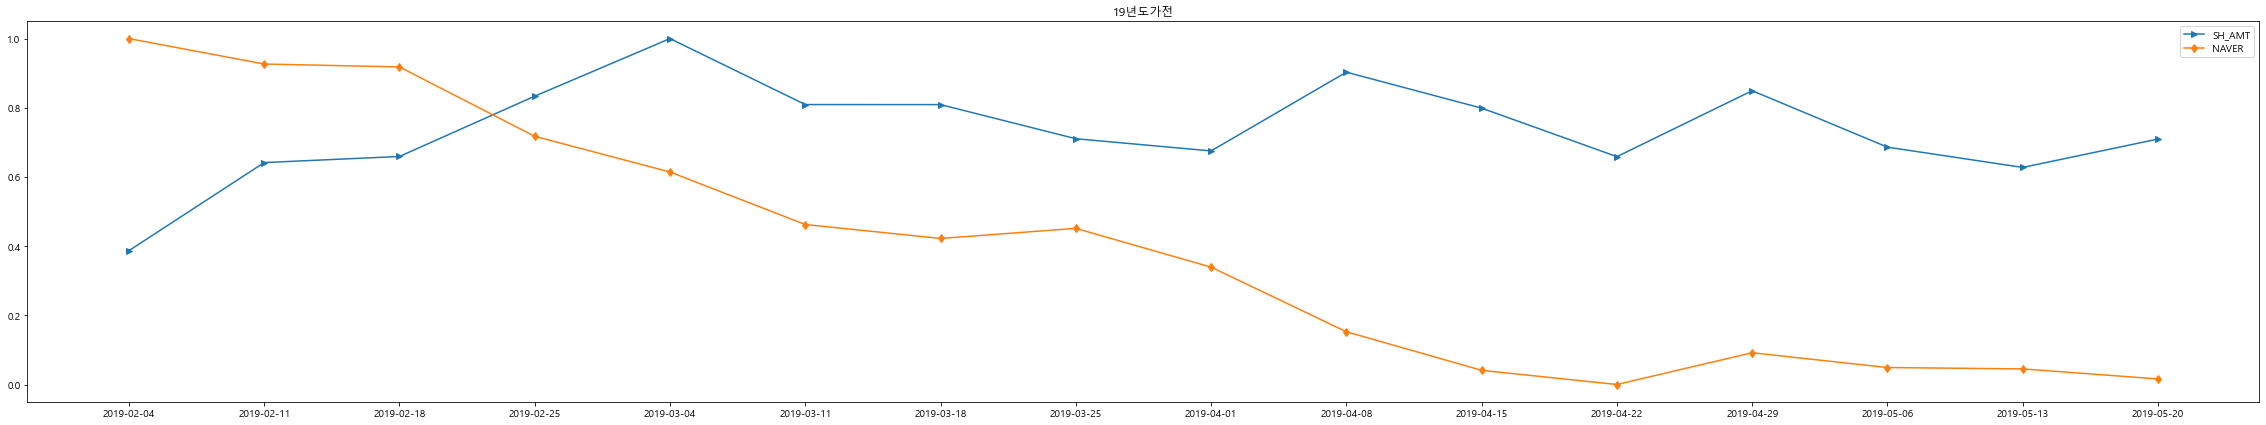

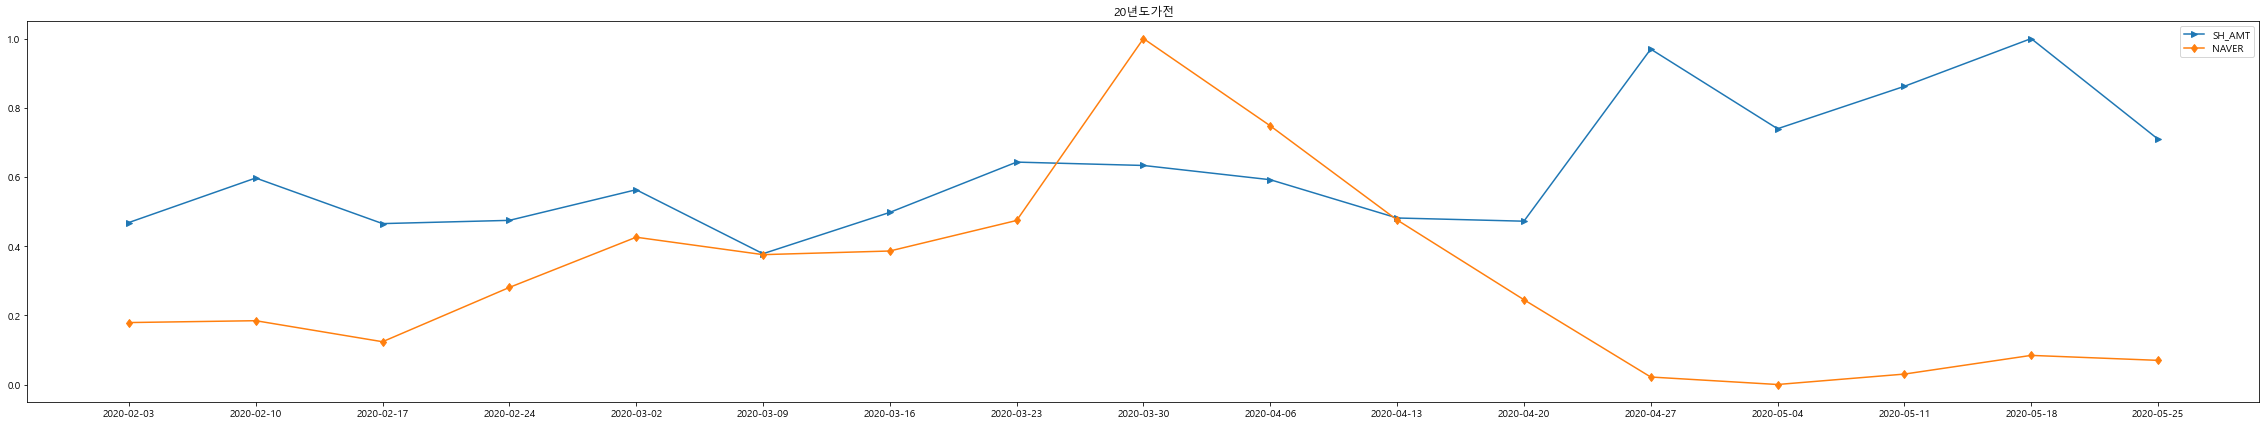

In [48]:
category = '가전'
category_num = 35
week_2019,week_2020,day_2019,day_2020 = file_open(category)
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [49]:
corr_19

,0,0
0,1.000000,-0.272571
0,-0.272571,1.000000


In [50]:
corr_20

,0,0
0,1.000000,-0.378586
0,-0.378586,1.000000


## 유통업

In [60]:
category = '유통업'
category_num = 40
week_2019,week_2020,day_2019,day_2020 = file_open(category)

In [62]:
# 네이버 데이터랩에서 주제어 2개로 검색한 결과 합치기
week_2019_date = week_2019['날짜']
week_2020_date = week_2020['날짜']
week_2019 = pd.DataFrame(week_2019.sum(axis=1),columns = ['유통업'])
week_2020 = pd.DataFrame(week_2020.sum(axis=1),columns = ['유통업'])
week_2019 = pd.concat([week_2019,week_2019_date], axis = 1)
week_2020 = pd.concat([week_2020,week_2020_date], axis = 1)
week_2019

,유통업,날짜
0,159.63463,2019-02-04
1,148.47991,2019-02-11
2,146.39067,2019-02-18
3,149.51329,2019-02-25
4,130.42521,2019-03-04
5,128.87077,2019-03-11
6,132.02713,2019-03-18
7,129.47180,2019-03-25
8,131.55356,2019-04-01
9,130.94003,2019-04-08


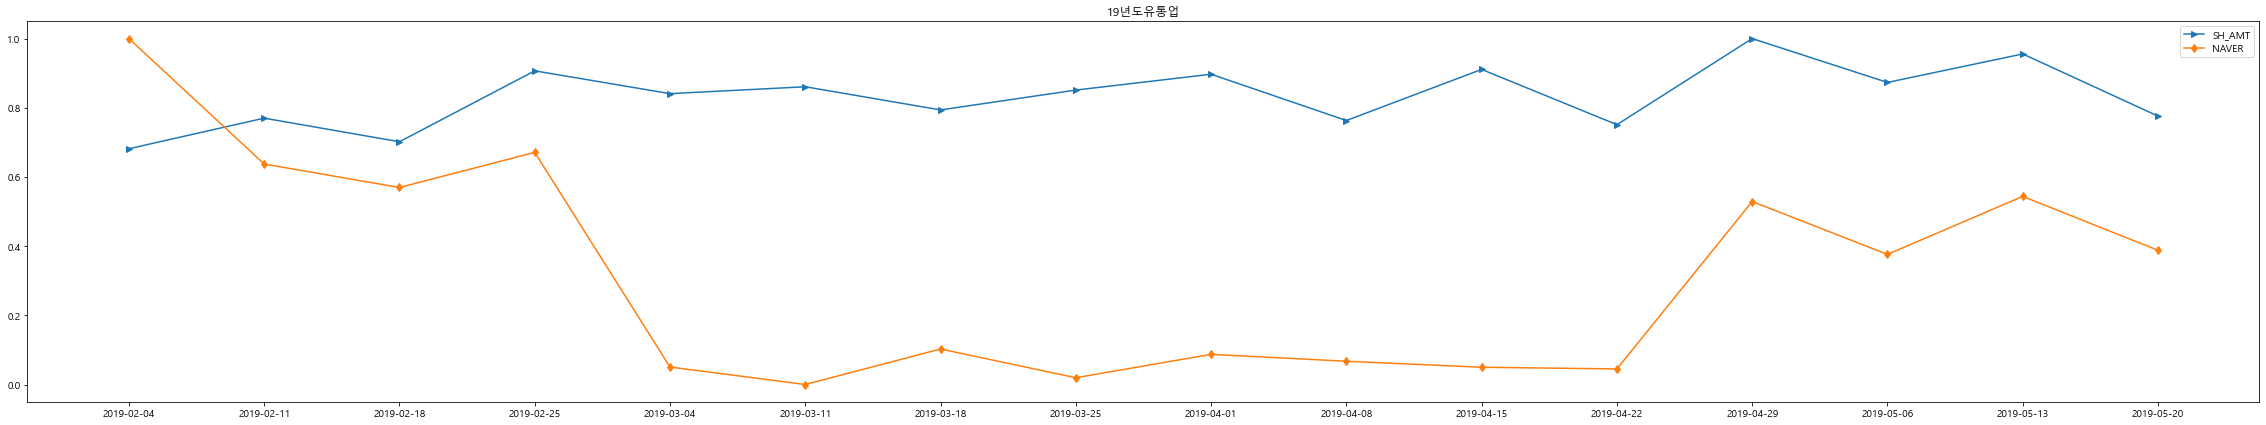

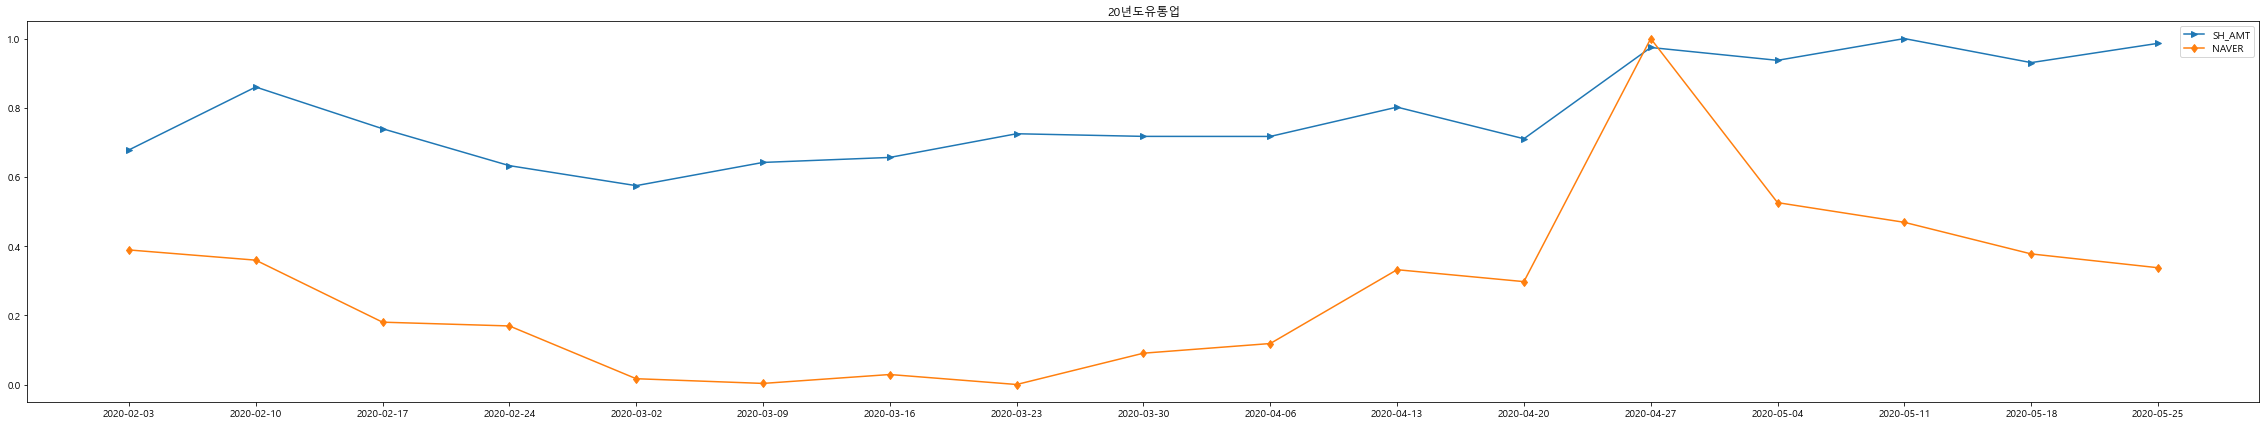

In [63]:
sh_2019 = year_2019.loc[year_2019['INDUSTRY_CODE']==category_num]
sh_2020 = year_2020.loc[year_2020['INDUSTRY_CODE']==category_num]
sh_2019, sh_2020 = week_sum(sh_2019,sh_2020)
naver_week_2019, naver_week_2020 = scale_naver(week_2019, week_2020, category)
sh_2019,sh_2020 = scale_sh(sh_2019,sh_2020)
draw_graph(category)
naver_week_2019,sh_2019,naver_week_2020,sh_2020 = reshape_(naver_week_2019,sh_2019,naver_week_2020,sh_2020)
corr_19,corr_20 = correlation(naver_week_2019,sh_2019,naver_week_2020,sh_2020)

In [64]:
corr_19

,0,0
0,1.000000,-0.174555
0,-0.174555,1.000000


In [65]:
corr_20

,0,0
0,1.000000,0.753628
0,0.753628,1.000000
